## Leak Test
- 'cipa-JK-v1' model is the baseline model.
- 'cipa-JK-v2' model don't has the leak subtraction.

In [1]:
import os, sys, time, copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
import myokit
sys.path.append('../../../')
sys.path.append('../../../Protocols')
sys.path.append('../../../Models')
sys.path.append('../../../Lib')
import protocol_lib, vc_protocols
import simulator_myokit

In [54]:
from dataclasses import dataclass, field
from datetime import datetime

def get_time() -> str:
    return f"{datetime.now()}"


class Results:
    def __init__(self, result_info): 
        self.d       = result_info
        self.times   = self.d["engine.time"]
        self.V       = self.d["membrane.V"]
        self.I_total = self.d["membrane.i_ion"]
        self.INa     = self.d["ina.INa"]
        self.INaL    = self.d["inal.INaL"]
        self.ICaL    = self.d["ical.ICaL"]
        self.Ito     = self.d["ito.Ito"]
        self.IKr     = self.d["ikr.IKr"]
        self.IKs     = self.d["iks.IKs"]
        self.IK1     = self.d["ik1.IK1"]
        self.IKb     = self.d["ikb.IKb"]
        self.INab    = self.d["inab.INab"]
        self.ICab    = self.d["icab.ICab"]
    
    def __str__(self):
        return "hello1"
    
    def __repr__(self):
        return get_time()
            
# @dataclass(frozen=True)    
# class Results:    
#     times:np.ndarray = field(init=True, default=None, repr=False)
#     V:np.ndarray = field(init=True, default=None, repr=False)
#     INa:np.ndarray = field(init=True, default=None, repr=False)
#     INaL:np.ndarray = field(init=True, default=None, repr=False)
#     ICaL:np.ndarray = field(init=True, default=None, repr=False)
#     Ito:np.ndarray = field(init=True, default=None, repr=False)
#     IKr:np.ndarray = field(init=True, default=None, repr=False)
#     IKs:np.ndarray = field(init=True, default=None, repr=False)
#     IK1:np.ndarray = field(init=True, default=None, repr=False)
            
#     created_at:str = field(default_factory=get_time, repr=True)

#     def __post_init__(self):         
#         print("post_init finished.")

In [55]:
'''
O'Hara CiPA v1.0 2017
'''
cell_types = {
    'Endocardial' : 0,
    'Epicardial' : 1,
    'Mid-myocardial' : 2,
}

protocol = vc_protocols.leemV1()
# protocol = pickle.load(open("./trial_steps_ramps_Kernik_200_50_4_-120_60_paper/shortened_trial_steps_ramps_Kernik_200_50_4_-120_60_500_artefact_True_short.pkl", 'rb'))
# protocol = pickle.load(open("./trial_steps_ramps_ORD2011_288_51_4_-121_61/shortened_trial_steps_ramps_ORD2011_288_51_4_-121_61_500_artefact_False_short.pkl", 'rb'))

end_time = protocol.get_voltage_change_endpoints()[-1]
t_span = (0, end_time)
t_eval = np.linspace(0, end_time, 10000)
print(end_time)

1320


In [56]:
start_time = time.time()
'''
'''    
model, p, s = myokit.load("../../../mmt-model-files/cipaJKv1.mmt")    
sim = simulator_myokit.Simulator(model, protocol, max_step=1.0, abs_tol=1e-08, rel_tol=1e-8, vhold=-80)  # 1e-12, 1e-14  # 1e-08, 1e-10
sim.name = "CiPA"  

print("--- %s seconds ---"%(time.time()-start_time))

--- 14.00930142402649 seconds ---


In [57]:
params = {         
    'cell.mode': cell_types['Mid-myocardial'],    
    'setting.simType': 1,   # 0: AP   |  1: VC  
    'ikb.GKb': 0.003, # [mS/uF]
    'inab.PNab': 3.75e-10,
    'icab.PCab': 2.5e-8,
}
sim.set_simulation_params(params)
sim.pre_simulate(5000, sim_type=1)
d = sim.simulate(end_time, log_times=None, 
                 extra_log=['membrane.i_ion', 'ina.INa', 'inal.INaL', 'ito.Ito', 'ical.ICaL', 'ical.ICaNa', 'ical.ICaK', 'ikr.IKr', 'iks.IKs', 'ik1.IK1', 'inaca.INaCa', 'inacass.INaCa_ss', 'inak.INaK', 'ikb.IKb', 'inab.INab', 'icab.ICab', 'ipca.IpCa'])

r0 = Results(d)
# r_myokit = Results(times=d["engine.time"], V=[protocol.get_voltage_at_time(t) for t in d["engine.time"]], 
#                    INa=d["ina.INa"], INaL=d["inal.INaL"], ICaL=d["ical.ICaL"], Ito=d["ito.Ito"], IKr=d["ikr.IKr"], IKs=d["iks.IKs"], IK1=d["ik1.IK1"])
r0

2023-02-17 13:02:56.835033

In [58]:
params = {         
    'cell.mode': cell_types['Mid-myocardial'],    
    'setting.simType': 1,   # 0: AP   |  1: VC  
    'ikb.GKb': 0.01,
    'inab.PNab': 0.0000001,
    'icab.PCab': 0.0000001,
}
sim.set_simulation_params(params)
sim.pre_simulate(5000, sim_type=1)
d = sim.simulate(end_time, log_times=None, 
                 extra_log=['membrane.i_ion', 'ina.INa', 'inal.INaL', 'ito.Ito', 'ical.ICaL', 'ical.ICaNa', 'ical.ICaK', 'ikr.IKr', 'iks.IKs', 'ik1.IK1', 'inaca.INaCa', 'inacass.INaCa_ss', 'inak.INaK', 'ikb.IKb', 'inab.INab', 'icab.ICab', 'ipca.IpCa'])

r1 = Results(d)
# r_myokit = Results(times=d["engine.time"], V=[protocol.get_voltage_at_time(t) for t in d["engine.time"]], 
#                    INa=d["ina.INa"], INaL=d["inal.INaL"], ICaL=d["ical.ICaL"], Ito=d["ito.Ito"], IKr=d["ikr.IKr"], IKs=d["iks.IKs"], IK1=d["ik1.IK1"])
r1

2023-02-17 13:02:57.109303

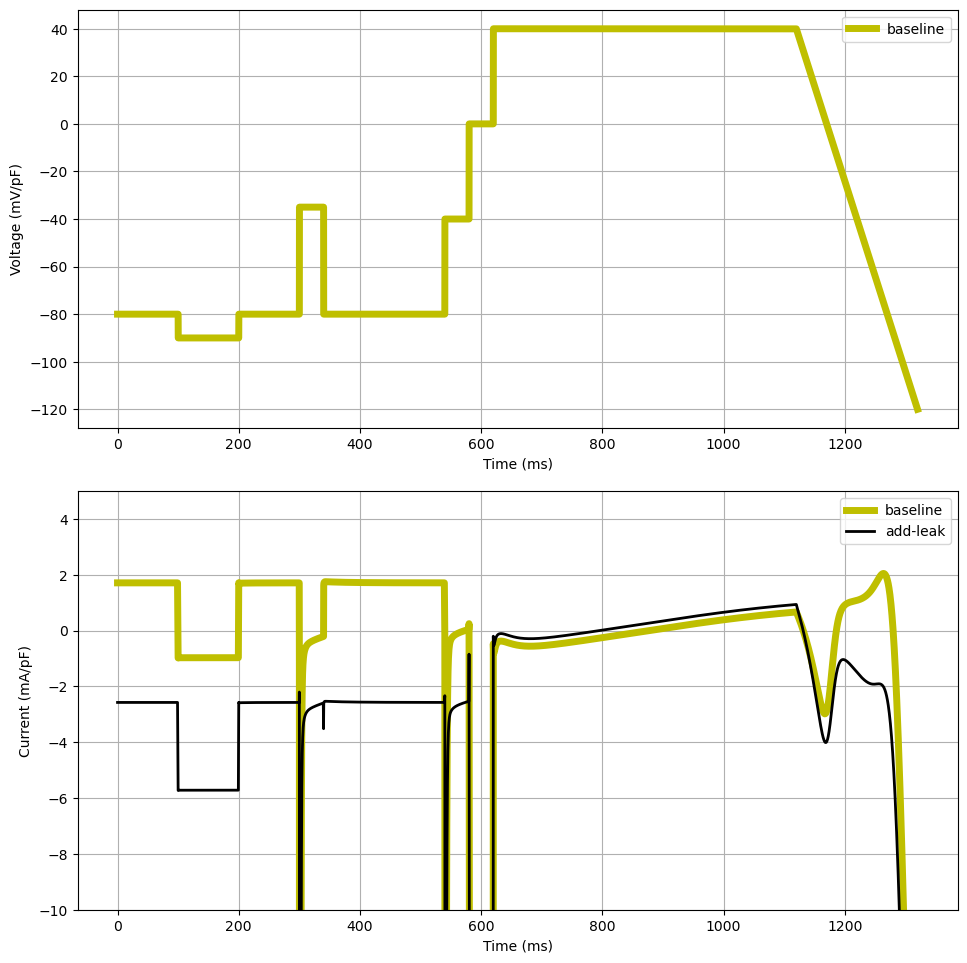

In [59]:
'''
Plot
'''
fig, ax = plt.subplots(2,1, figsize=(10,10))    
# fig.suptitle(sim.name, fontsize=14)
# ax.set_title('Simulation %d'%(simulationNo))
# axes[i].set_xlim(model_scipy.times.min(), model_scipy.times.max())
# ax[0].set_ylim(-5, 5)
ax[0].set_xlabel('Time (ms)')       
ax[0].set_ylabel(f'Voltage (mV/pF)')      
ax[0].plot( r0.times, [protocol.get_voltage_at_time(t) for t in r0.times], label="baseline", color='y', linewidth=5)         
ax[0].legend()
ax[0].grid()

ax[1].set_ylim(-10, 5)
ax[1].set_xlabel('Time (ms)')       
ax[1].set_ylabel(f'Current (mA/pF)')      
ax[1].plot( r0.times, r0.I_total, label="baseline", color='y', linewidth=5)         
ax[1].plot( r1.times, r1.I_total, label="add-leak", color='k', linewidth=2)        
ax[1].legend()
ax[1].grid()

plt.subplots_adjust(left=0.07, bottom=0.05, right=0.95, top=0.95, wspace=0.5, hspace=0.15)
plt.show()
fig.savefig(os.path.join('Results', "ORd2011_VC"), dpi=100)

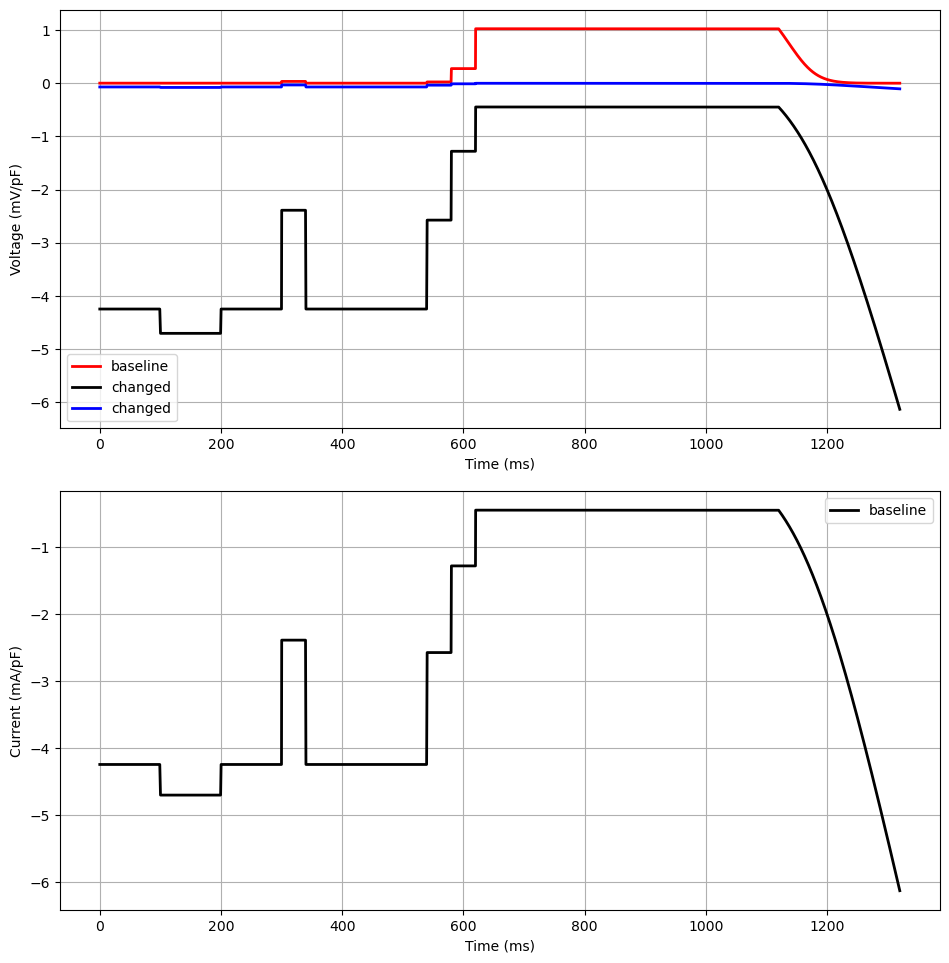

In [81]:
'''
Plot
 'ina.INa', 'inal.INaL', 'ito.Ito', 'ical.ICaL', 'ical.ICaNa', 'ical.ICaK', 'ikr.IKr', 'iks.IKs', 'ik1.IK1', 'inaca.INaCa', 
 'inacass.INaCa_ss', 'inak.INaK', 'ikb.IKb', 'inab.INab', 'icab.ICab', 'ipca.IpCa'
'''
fig, ax = plt.subplots(2,1, figsize=(10,10))    
# fig.suptitle(sim.name, fontsize=14)
# ax.set_title('Simulation %d'%(simulationNo))
# axes[i].set_xlim(model_scipy.times.min(), model_scipy.times.max())
# ax[0].set_ylim(-5, 5)
ax[0].set_xlabel('Time (ms)')       
ax[0].set_ylabel(f'Voltage (mV/pF)')      
ax[0].plot( r1.times, r1.IKb, label="baseline", color='r', linewidth=2)         
ax[0].plot( r1.times, r1.INab, label="changed", color='k', linewidth=2)         
ax[0].plot( r1.times, r1.ICab, label="changed", color='b', linewidth=2)         
ax[0].legend()
ax[0].grid()

# ax[1].set_ylim(-5, 5)
ax[1].set_xlabel('Time (ms)')       
ax[1].set_ylabel(f'Current (mA/pF)')      
ax[1].plot( r1.times, r1.INab, label="baseline", color='k', linewidth=2)         
ax[1].legend()
ax[1].grid()

plt.subplots_adjust(left=0.07, bottom=0.05, right=0.95, top=0.95, wspace=0.5, hspace=0.15)
plt.show()
fig.savefig(os.path.join('Results', "ORd2011_VC"), dpi=100)

In [61]:
print("Complete")

Complete
